Import project source code and plotting function.

In [1]:
from opticam import Sky, Target, Instrument, Observation
import matplotlib.pyplot as plt

Create sky object. Lunar phase can go from 0 (New moon) to 1 (Full moon). Seeing is in arcseconds.

In [14]:
sky = Sky(lunar_phase=0.5, seeing=1.3)

Create Target Object. First entry is the target's magnitude, second entry is a string that specifies the magnitude system of the input magnitude, third entry is the band pass for entered magnitude (Entered example is the V bandpass), and the last entry is the black-body temprature of the target. Default value is solar temperature.

In [24]:
#star = Target(16.5, 'VEGAMAG', 'V', temp=5000)
#star2 = Target(20.1, 'VEGAMAG', 'V', index=4)
star = Target(13.1, 'VEGAMAG', 'V', temp=8000)

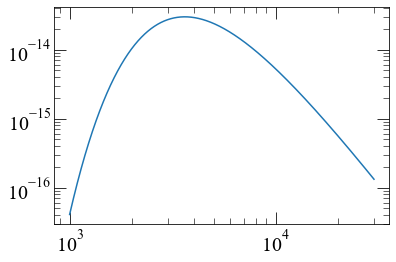

In [25]:
xx = range(1000,30000)
plt.plot(xx,star.F_lambda(xx))
#plt.plot(xx,star2.F_lambda(xx))
#plt.plot(xx,star3.F_lambda(xx))
plt.xscale('log')
plt.yscale('log')
#plt.plot(star.w_lambda,star.F_lambda)

Create Instrument object. Can choose between 5 instruments (Case Sensitive):  Arctic, Arces, DIS, TripleSpec, and NICFPS.

Lets use a new instrument now, in this case an imager called Opticam

In [26]:
inst = Instrument('Opticam')

Now lets make an observation with this new instrument on the same target as before.
We can use the same sky and star objects made before

In [27]:
ob2 = Observation(star, sky, inst)

We'll calcuate the S/N and exposure time using the same values as before, but now the output will be diffrent

In [30]:
sn2 = ob2.SNfromTime(2) #value in seconds

t2 = ob2.TimefromSN(50) #value in S/N ratio

In [31]:
print(sn2)
print(t2)

[[161.61074343209793, 'uprime_filter'], [578.2761904729467, 'gprime_filter'], [577.9585275436569, 'rprime_filter'], [474.69577137509805, 'iprime_filter'], [277.11980392985413, 'zprime_filter']]
[[0.19684932730129892, 'uprime_filter'], [0.015418257086551198, 'gprime_filter'], [0.015434973322731823, 'rprime_filter'], [0.02287695902762307, 'iprime_filter'], [0.06706919737653445, 'zprime_filter']]


Now each index is a filter in the imager

Now lets try using the makeplot routine included in the APOExptime package. 

In [32]:
from opticam import makeplots

To use it, first you have to run either SNfromTime run or TimefromSN so that the observatiopn object now has those calcuations stored. We'll use the Arctic imager this time

In [34]:
inst3 = Instrument('Opticam')
ob3 = Observation(star, sky, inst)
ob3.SNfromTime(2)

[[161.61074343209793, 'uprime_filter'],
 [578.2761904729467, 'gprime_filter'],
 [577.9585275436569, 'rprime_filter'],
 [474.69577137509805, 'iprime_filter'],
 [277.11980392985413, 'zprime_filter']]

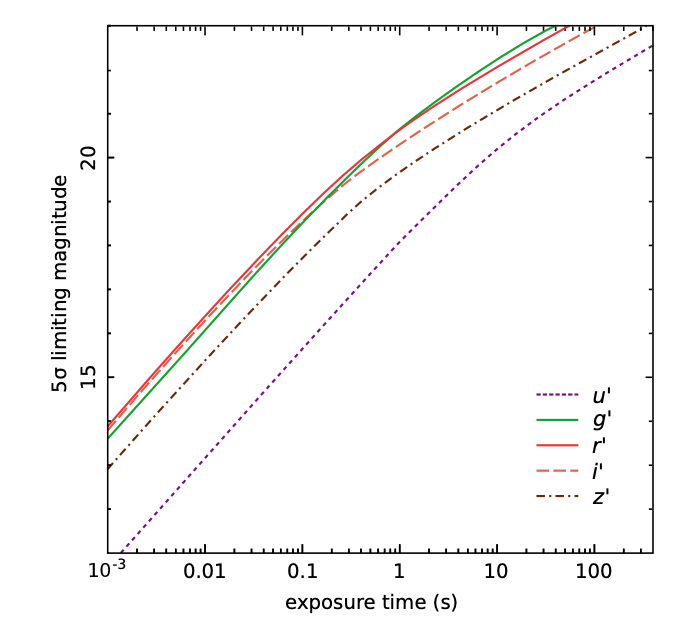

Notice that we don't need to pull the results into a variable, they are also stored as an attribute of the observation object.

makeplots takes two arguments, first is the observation object you want a plot from, second is what calcuation you want to plot. For this case we're going to plot S/N. To plot Exposure time, replace the 'SN' string with 'Time'

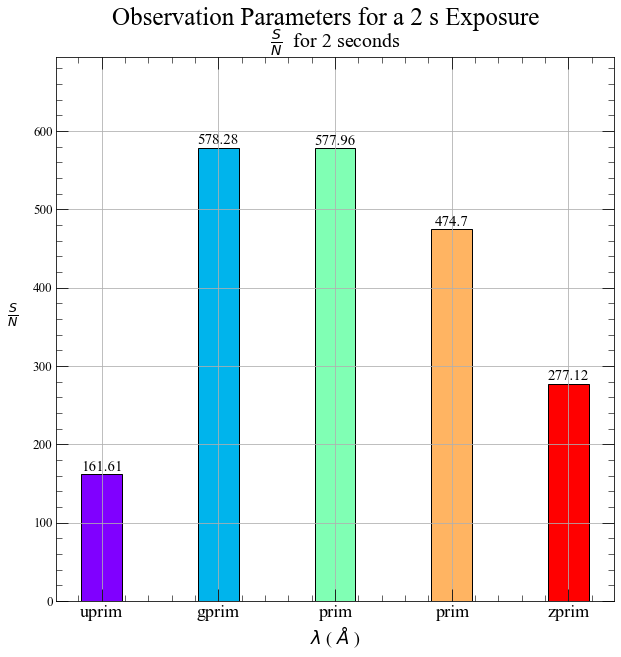

In [39]:
dd = makeplots(ob3, 'SN')

A new pretty plot is made for you! with the filters labeled. Next an example of a spectrograph throught the makeplots routine

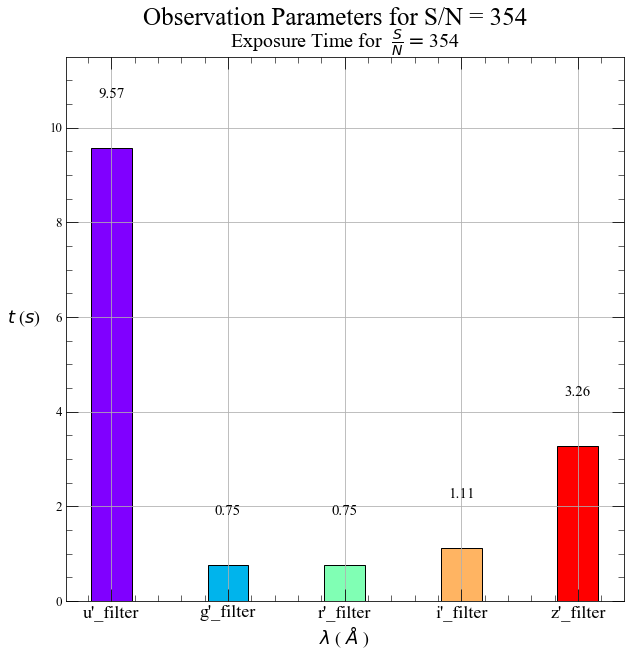

In [38]:
ob4 = Observation(star, sky, inst)
ob4.TimefromSN(354)

dd = makeplots(ob4, 'Time')

In [21]:
import numpy as np
np.array(t2).T[0].astype('f8')

array([ 1654.36050727,   406.17949826,   943.0970681 ,  3021.21161605,
       25093.68509066])

In [33]:
mags = np.arange(11,29,1.0)
snr = 100
sky = Sky(lunar_phase=1, seeing=2.0)
inst = Instrument('Opticam',Telescope_name='spm2_1m')

texp = []
for mag in mags:
    star = Target(mag, 'VEGAMAG', 'V', index=0)
    ob2 = Observation(star, sky, inst)
    
    t2 = ob2.TimefromSN(snr) #value in S/N ratio
    texp.append(np.array(t2).T[0].astype('f8'))
    
texp = np.array(texp)

Text(0.5, 0, 'Exposure Time / s')

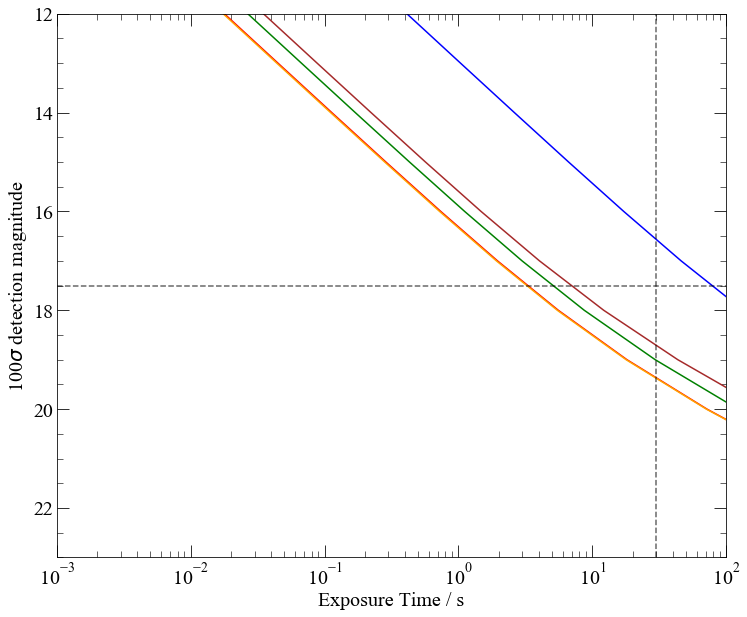

In [38]:
fig = plt.figure(figsize=(12,10))
colors = ['b','g','r','orange','brown']
for i in range(5):
    plt.plot(texp[:,i],mags,color=colors[i])
plt.xscale('log')
plt.ylim(23,12)
plt.xlim(1e-3,100)

plt.axhline(y=17.5,ls='--',color='k',alpha=0.6)


plt.axvline(x=30,ls='--',color='k',alpha=0.6)
plt.ylabel(str(snr)+r'$\sigma$ detection magnitude')
plt.xlabel('Exposure Time / s')

In [37]:
star.mag

28.0

In [49]:
from synphot import SpectralElement
b = SpectralElement.from_filter('johnson_v')

In [55]:
b.avgwave().value-b.equivwidth().value/2.,b.avgwave().value+b.equivwidth().value/2.

(5061.880202788401, 5919.230197939563)

In [58]:
filt_range = 'B'
if filt_range is None:
    filt_range = [5000, 6000]
    print('None')
if isinstance(filt_range,str):
    print('string')
    

string
